# Predictive Modeling for Apple Quality Prediction #

## Introduction ##
In this project, we will analyze the dataset of apple quality to build a model that will predict the quality of apple.

## Dataset Description ##
This [dataset](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality?select=apple_quality.csv) contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.

### Attribute Description ###
- `A_id` : Unique identifier for each apple
- `Size` : Size of the apple
- `Weight` : Weight of the apple
- `Sweetness` : Degree of sweetness of the apple
- `Crunchiness` : Texture indicating the crunchiness of the apple
- `Juiciness` : Level of juiciness of the apple
- `Ripeness` : Stage of ripeness of the apple
- `Acidity` : Acidity level of the apple
- `Quality` : Overall quality of the apple

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/apple_quality.csv')

Mounted at /content/drive


In [3]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


We will convert datatype of `Acidity` attribute from object to float.

`Acidity` attribute has one more value than other attributes.

In [5]:
data.iloc[-1]

A_id                                         NaN
Size                                         NaN
Weight                                       NaN
Sweetness                                    NaN
Crunchiness                                  NaN
Juiciness                                    NaN
Ripeness                                     NaN
Acidity        Created_by_Nidula_Elgiriyewithana
Quality                                      NaN
Name: 4000, dtype: object

In [6]:
# drop the last row as it contains NaN values
data = data[:-2]

In [7]:
# Drop `A_id` attribute as it has no relevance for our analysis
data.drop('A_id', axis = 1, inplace = True)

<ipython-input-7-27b603fb1b66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('A_id', axis = 1, inplace = True)


In [8]:
# Convert datatype of Acidity attribute to calculate correlation
data['Acidity'] = data['Acidity'].astype('float64')

<ipython-input-8-411f32061773>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Acidity'] = data['Acidity'].astype('float64')


In [9]:
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,-0.503210,-0.989365,-0.470626,0.986013,0.511929,0.498596,0.076496
std,1.928260,1.602666,1.943661,1.402524,1.930490,1.874553,2.110396
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.817327,-2.011774,-1.738426,0.063858,-0.801333,-0.769899,-1.377510
50%,-0.513836,-0.984489,-0.505210,0.998566,0.533504,0.504153,0.022421
75%,0.805724,0.032180,0.802034,1.894882,1.836050,1.767142,1.509737
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


### Removing Missing Values ###
We will use `dropna()` method with `axis = 0` to clean dataset by removing rows with misssing values. This parameter specifies the operation should be performed row-wise.

In [10]:
data.dropna(axis = 0 )

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,good
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad


### Finding relationships between attributes ###

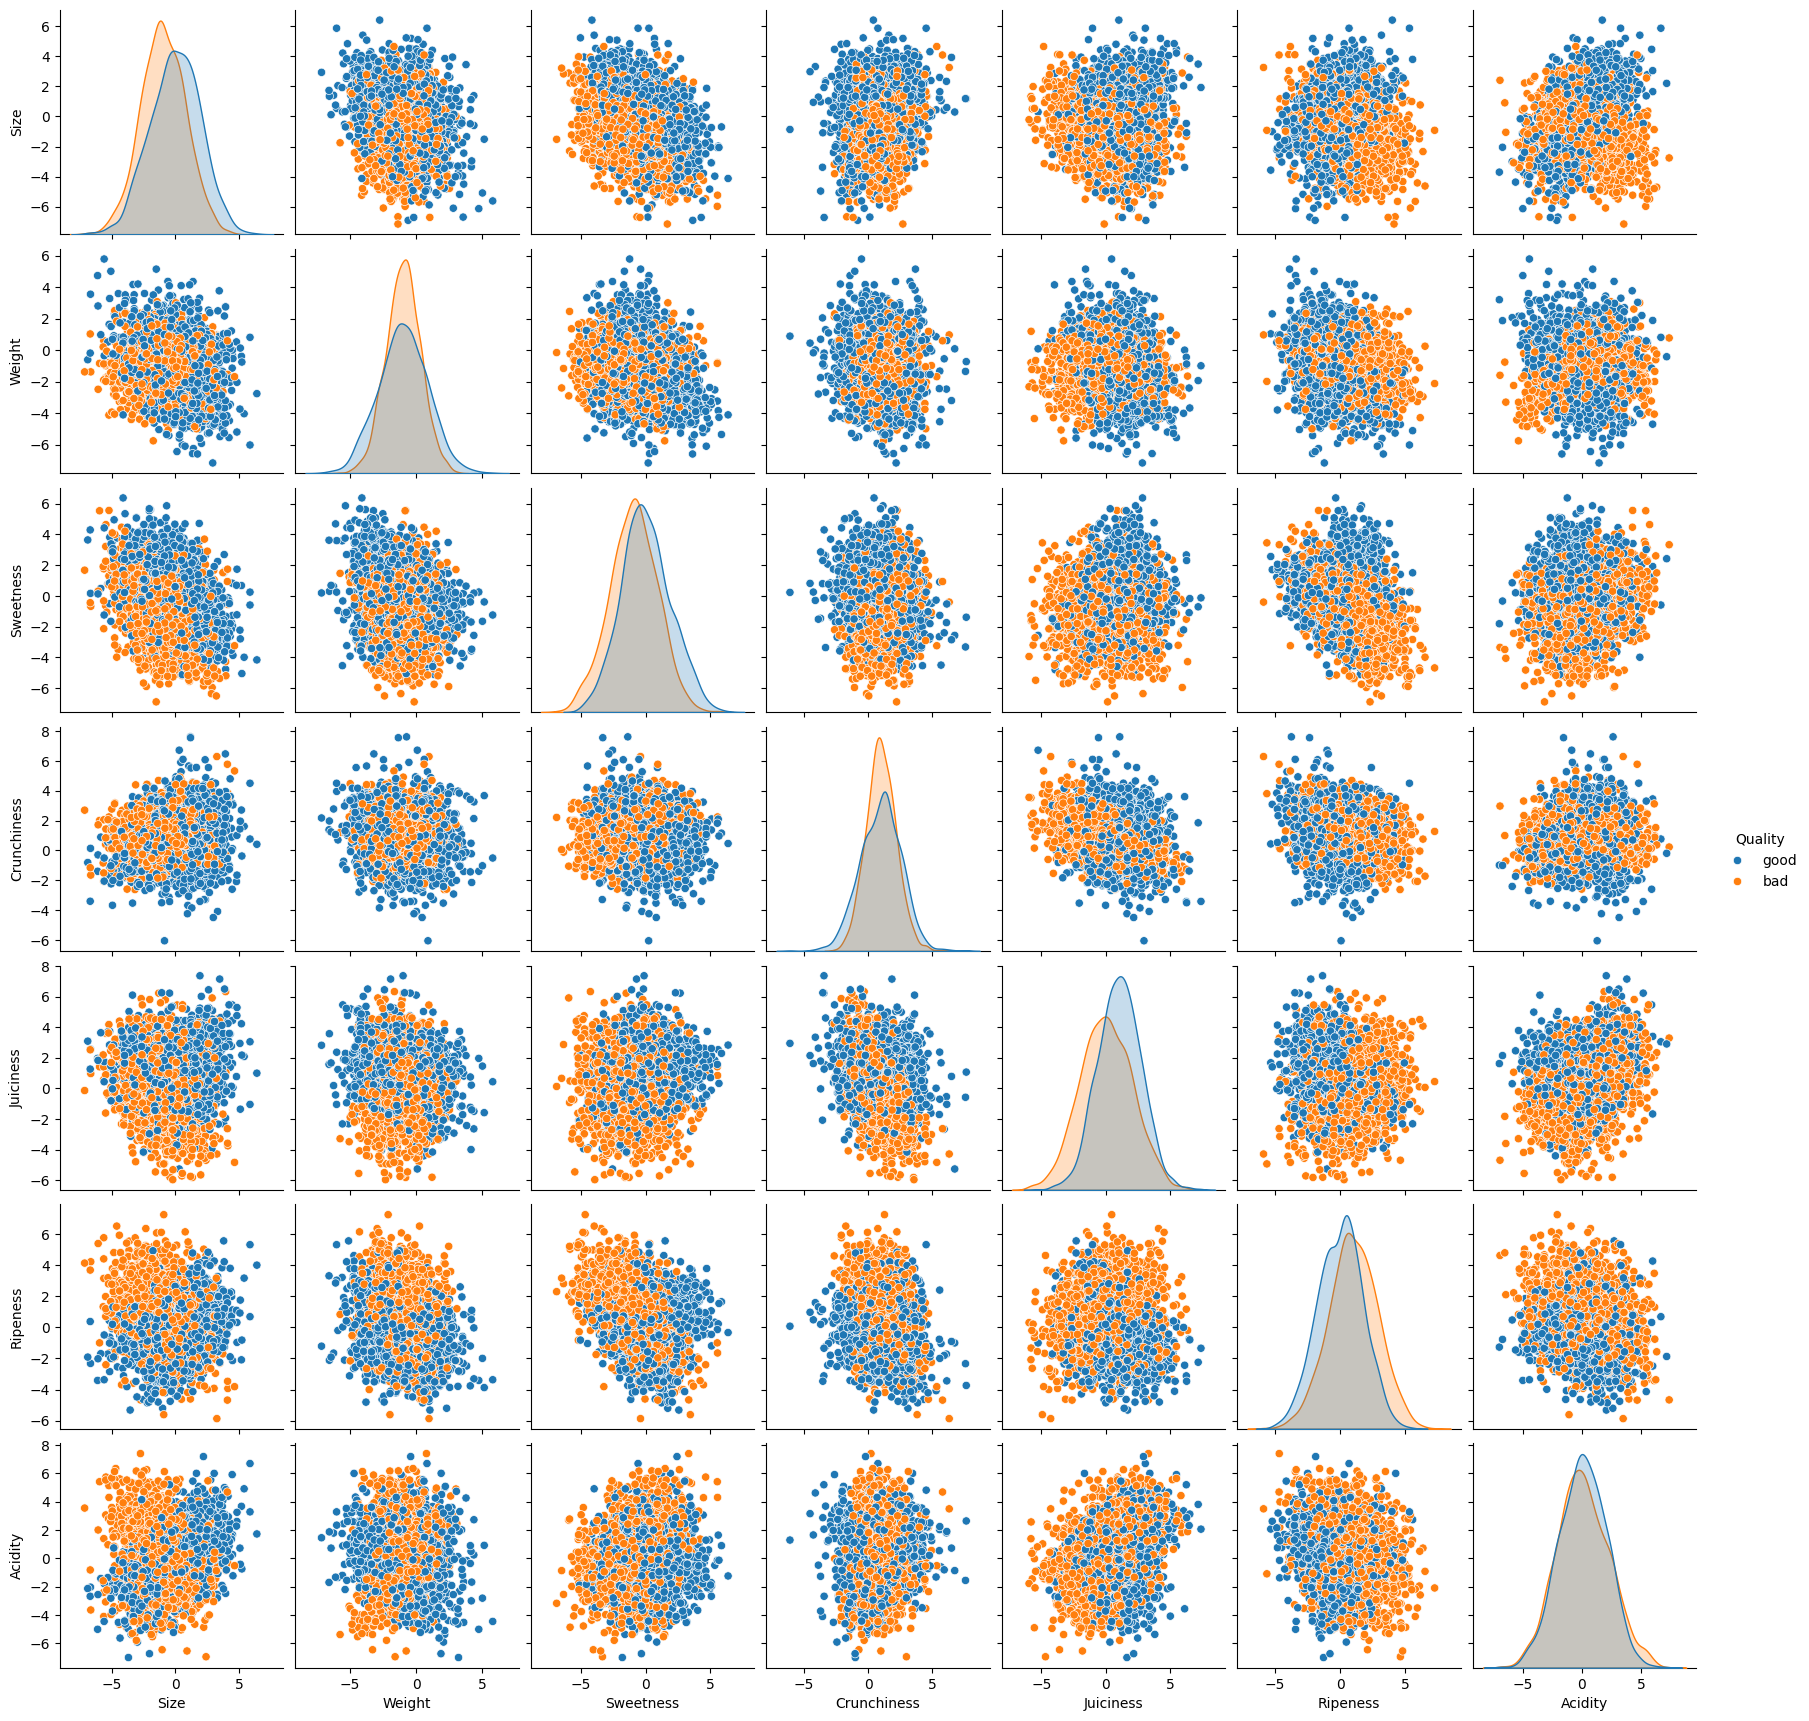

In [11]:
sns.pairplot(data, hue='Quality')
plt.show()

From the scatter plot matrix, we can see that there is a strong positive correlation between the `size`, `weight`, and `sweetness` of the apples, and a slight negative correlation between the `juiciness` and `quality`, `size` and `quality`. We also observe counterintuitive facts, that bigger `size` apple tend to have smaller `weight`, smaller `size` apples could have bigger weight. It's the same effect between `ripeness` and `sweetness`. More `ripe` apples could have smaller `sweetness`, while less `ripe` apples, could lead to higher `sweetness`.

### Checking Data Distribution with Histograms ###

<Figure size 1200x800 with 0 Axes>

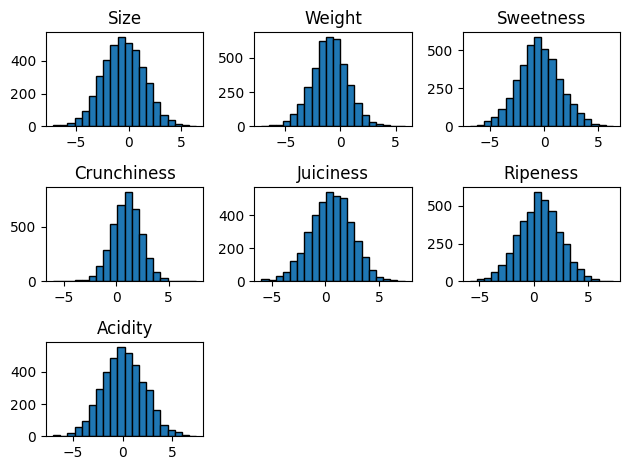

In [12]:
plt.figure(figsize = (12, 8))
data.hist(bins = 20, edgecolor = 'black', grid = False)
plt.tight_layout()
plt.show()

Overall, the histograms suggest that some of the variables have skewed distributions and/or outliers.

### Removing Outliers ###
We will check for any outliers by plotting boxplot for each variable.

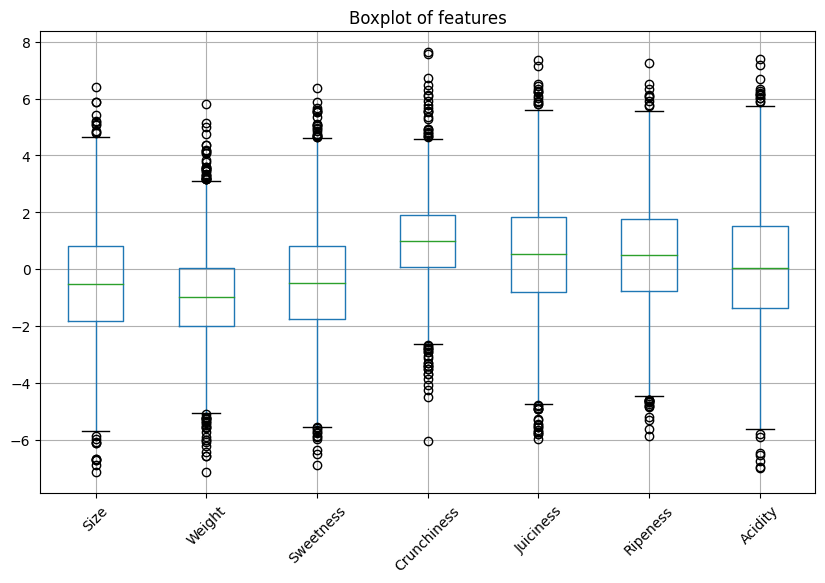

In [13]:
# Visualizing outliers using boxplots
plt.figure(figsize = (10, 6))
data.boxplot()
plt.xticks(rotation = 45)
plt.title("Boxplot of features")
plt.show()

Based on the boxplot, we can observe that some of the attributes have outliers beyond the whiskers of the boxplot. Specifically, we can see that there are some extreme values in the `Size`, `Weight`, `Sweetness`, `Crunchiness`, `Juiciness`, and `Ripeness` attributes. These outliers may affect the performance of predictive models, and we will remove them.

To remove outliers, we will use the z-score method, which involves calculating the z-score for each value in a attributes and removing any values with a z-score greater than a certain threshold (e.g., 3).

In [14]:
# Remove outliers using Z-score method for numerical columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
z_scores = stats.zscore(data[numeric_columns])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data = data[filtered_entries]

In [15]:
data.shape

(3902, 8)

In [16]:
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000,3902.000000
mean,-0.512140,-0.990809,-0.471277,0.981165,0.519647,0.515924,0.073430
std,1.886096,1.550183,1.910467,1.334683,1.881398,1.839542,2.081089
min,-6.099551,-5.746384,-5.958315,-3.127340,-4.924983,-4.851519,-5.917900
25%,-1.816121,-1.998099,-1.729258,0.078055,-0.791374,-0.732812,-1.376784
50%,-0.525104,-0.983899,-0.504758,0.994626,0.527427,0.522591,0.020796
75%,0.774813,0.021661,0.790203,1.879485,1.826516,1.771852,1.498324
max,5.225383,3.772173,5.346330,4.937210,6.226448,6.102587,6.348870


After removing outliers based on z-scores, the final dataset has 3902 rows. This represents a loss of 96 rows (or 2.4% of the original dataset). Based on this and summary statistics, we can conclude that the impact of removing outliers was minimal and did not result in a significant loss of data.

In [17]:
# Check for any missing value
data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

### Finding Correlation Between Attributes ###

In [18]:
data['quality_numeric'] = data['Quality'].map({'good' : 1, 'bad' : 0})
data['quality_numeric'] = data['quality_numeric'].astype('int64')
data = data.drop('Quality', axis=1)  # remove object field

In [19]:
relevant_cols = data.loc[:, ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'quality_numeric']]
corr_matrix = relevant_cols.corr()

In [20]:
print(corr_matrix)

                     Size    Weight  Sweetness  Crunchiness  Juiciness  \
Size             1.000000 -0.153720  -0.324552     0.161086  -0.018199   
Weight          -0.153720  1.000000  -0.153306    -0.087583  -0.088741   
Sweetness       -0.324552 -0.153306   1.000000    -0.029170   0.084643   
Crunchiness      0.161086 -0.087583  -0.029170     1.000000  -0.242082   
Juiciness       -0.018199 -0.088741   0.084643    -0.242082   1.000000   
Ripeness        -0.144131 -0.237224  -0.272627    -0.198449  -0.107443   
Acidity          0.185830  0.027065   0.073327     0.066083   0.244859   
quality_numeric  0.250592 -0.002243   0.250875    -0.007663   0.255056   

                 Ripeness   Acidity  quality_numeric  
Size            -0.144131  0.185830         0.250592  
Weight          -0.237224  0.027065        -0.002243  
Sweetness       -0.272627  0.073327         0.250875  
Crunchiness     -0.198449  0.066083        -0.007663  
Juiciness       -0.107443  0.244859         0.255056  
Rip

Based on the correlations provided between each numerical feature (`Size`, `Weight`, `Sweetness`, `Crunchiness`, `Juiciness`, `Ripeness`, `Acidity`) and the numerical attribute `quality_numeric`, here are some observations:

1. `Size` and `quality_numeric` (0.250592):
    - Positive correlation: Larger apples tend to be perceived as higher quality.
    
2.  `Sweetness` and `quality_numeric` (0.250875):
    - Positive correlation: Sweeter apples tend to be perceived as higher quality.
    
3. `Juiciness` and `quality_numeric` (0.255056):
    - Positive correlation: Juicier apples tend to be perceived as higher quality.
    
4. `Ripeness` and `quality_numeric` (-0.263595):
    - Negative correlation: Less ripe apples tend to be perceived as higher quality.

Attributes such as `Weight`, `Crunchiness`, and `Acidity` exhibit weak correlations with the `quality_numeric`.

### Selection of Attributes for Apple Quality Prediction Model ###

To build a predictive model for predicting apple quality, you need to select attributes that are likely to be predictive of apple quality. Here are some variables that you can consider using to predict apple quality based on the correlations and domain knowledge:

1. `Size` : Larger apples may be perceived as higher quality.
2. `Sweetness` : Sweeter apples may be perceived as higher quality.
3. `Juiciness` : Juicier apples may be perceived as higher quality
4. `Ripeness` : Apples at the optimal ripeness level may be perceived as higher quality.
5. `Acidity` : Lower acidity levels may be associated with higher quality apples

## Model Training and Evaluation ##

We first use gradient boosting machines to build up an learning regression machine for apply quality prediction.

In [39]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset

X = data.drop('quality_numeric', axis=1)  # Features
y = data['quality_numeric']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost Regressor instance
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=50, max_depth=6, learning_rate=0.1)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.09


We then use RandomForestRegressor to build up a predictor and predict apple quality score.

In [52]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest regressor with 100 trees
#rf = RandomForestRegressor(n_estimators=15, random_state=2)
rf = RandomForestClassifier(
        n_estimators=100, criterion='gini',
        max_depth=None,min_samples_split=2,
        min_samples_leaf=1, min_weight_fraction_leaf=0.0,
        max_features='auto', max_leaf_nodes=None,
        bootstrap=True,
        oob_score=False, n_jobs=1,
        random_state=None, verbose=0,
        warm_start=False, class_weight=None)

# Train the random forest on the training data
rf.fit(X_train, y_train)

# Evaluate the performance of the random forest on the test data
score = rf.score(X_test, y_test)
print('R^2 score:', score)
mse = (1 - score) * y.var()
print(f'Mean Squared Error: {mse:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


R^2 score: 0.8886043533930857
Mean Squared Error: 0.03


We alos build a support vector machine for apply quality prediction.

In [58]:
# Import the necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a support vector machine classifier with a radial basis function kernel
svm = SVC(kernel='sigmoid', C=1, gamma=0.1)

# Train the support vector machine on the training data
svm.fit(X_train, y_train)

# Evaluate the performance of the support vector machine on the test data
score = svm.score(X_test, y_test)
print('R^2 score:', score)
mse = (1 - score) * y.var()
print(f'Mean Squared Error: {mse:.2f}')

R^2 score: 0.4199743918053777
Mean Squared Error: 0.15


At last, we build an artificial machine learning network for quality prediction.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error', metrics=[mean_squared_error])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
mse = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Mean Squared Error: {mse[0]:.2f}')

Epoch 1/100
98/98 [==============================] - 2s 6ms/step - loss: 0.1868 - mean_squared_error: 0.1868 - val_loss: 0.1180 - val_mean_squared_error: 0.1180
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1032 - val_mean_squared_error: 0.1032
Epoch 3/100
98/98 [==============================] - 0s 5ms/step - loss: 0.1093 - mean_squared_error: 0.1093 - val_loss: 0.0944 - val_mean_squared_error: 0.0944
Epoch 4/100
98/98 [==============================] - 0s 5ms/step - loss: 0.1020 - mean_squared_error: 0.1020 - val_loss: 0.0935 - val_mean_squared_error: 0.0935
Epoch 5/100
98/98 [==============================] - 0s 4ms/step - loss: 0.0969 - mean_squared_error: 0.0969 - val_loss: 0.0879 - val_mean_squared_error: 0.0879
Epoch 6/100
98/98 [==============================] - 0s 5ms/step - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.0881 - val_mean_squared_error: 0.0881
Epoch 7/100
98/98 [===============

From the above experiments, we can compare the 4 MSE error in apple quality prediction:

1. Gradient Boosting: 0.09
2. Random Forest Regressor: 0.09
3. Support vector machine: 0.02
4. ANN: 0.06

We can see SVM perform the lowest prediciton error in this case.

### Conclusion
Support Vector Machine outperforms all models and correctly predicts the apple quality.